<a href="https://colab.research.google.com/github/py222015328/CEE2/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv("RioDeJaneiro.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2302715,guilherme,11706874,Guilherme,NaN,Anil,-22.95221,-43.32944,Entire home/apt,2700.0,10,0,NaN,NaN,1,365,0,NaN
1,2304688,OLIMPÍADAS 2016,10405816,Eurico,NaN,Ipanema,-22.98767,-43.18991,Entire home/apt,837.0,7,0,NaN,NaN,1,365,0,NaN
2,2306547,Amplo Apto com 3 Dormitórios em Copacabana - 1...,4107346,Vera Lucia,NaN,Copacabana,-22.97333,-43.18857,Entire home/apt,800.0,5,13,2025-03-05,0.21,1,257,3,NaN
3,2306767,Studio in Copacabana Beach,11386725,Carolina,NaN,Copacabana,-22.96477,-43.17605,Entire home/apt,190.0,3,193,2025-03-03,1.44,6,66,19,NaN
4,2308385,Copacabana Ótima opção!,11788583,Ivan,NaN,Copacabana,-22.96820,-43.18523,Entire home/apt,220.0,2,28,2025-03-01,0.21,1,242,4,NaN


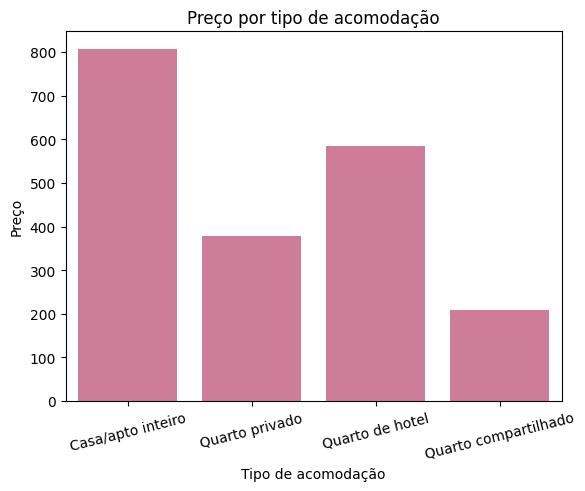

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

df['room_type'] = df['room_type'].replace({
    'Entire home/apt': 'Casa/apto inteiro',
    'Private room': 'Quarto privado',
    'Shared room': 'Quarto compartilhado',
    'Hotel room': 'Quarto de hotel'
})

sns.barplot(data=df,x='room_type', y='price', errorbar=None, color ='palevioletred')
plt.title('Preço por tipo de acomodação')
plt.xticks(rotation=14)
plt.xlabel('Tipo de acomodação')
plt.ylabel('Preço')
plt.show()

# Quais tipos de acomodação são mais caros?

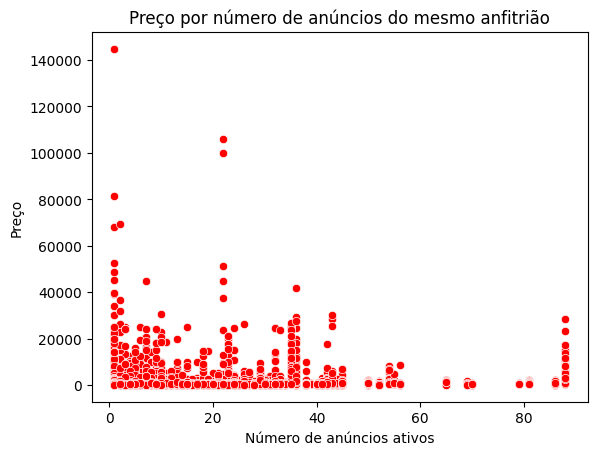

In [85]:
# Filtrando outlieris
df_filtrado = df[(df['price'] < 150000) & (df['calculated_host_listings_count'] < 120)]

sns.scatterplot(data=df_filtrado,x='calculated_host_listings_count', y='price', color='red')
plt.title('Preço por número de anúncios do mesmo anfitrião')
plt.xlabel('Número de anúncios ativos')
plt.ylabel('Preço')
plt.show()

# Anfitriões com muitos imóveis cobram muito?

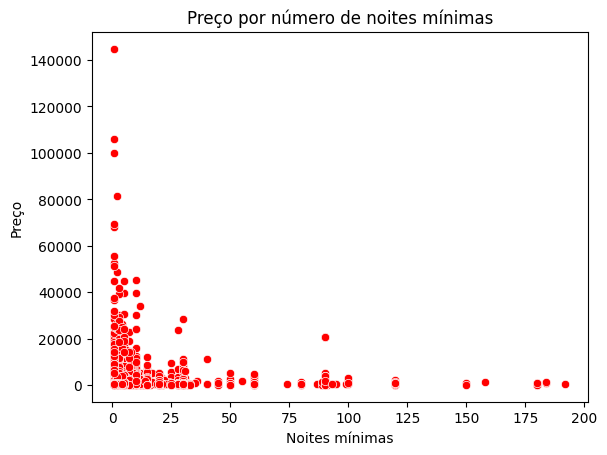

In [79]:
# Será que anfitriões que exigem mais noites cobram mais caro?

#Filtrando outliers
df_filtrado2 = df[(df['minimum_nights'] < 200) & (df['price'] < 150000) ]

sns.scatterplot(data=df_filtrado2,x='minimum_nights', y='price', color='red')
plt.title('Preço por número de noites mínimas')
plt.xlabel('Noites mínimas')
plt.ylabel('Preço')
plt.show()

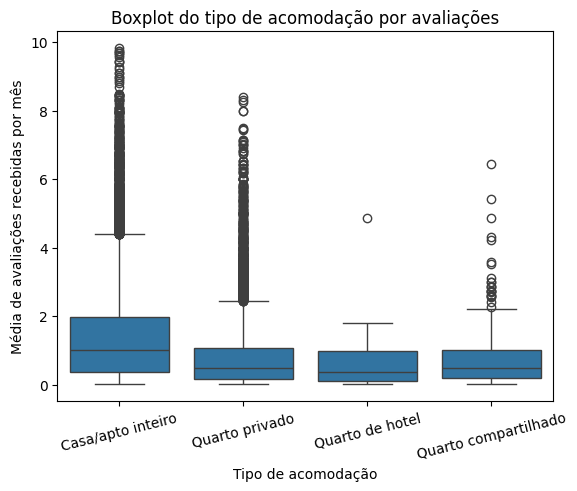

In [74]:
# Qual tipo de acomodação recebe mais feedback dos hóspedes?

#Filtrando outliers
df_filtrado3 = df[df['reviews_per_month']<10]

sns.boxplot(data=df_filtrado3, x='room_type', y= 'reviews_per_month')
plt.xticks(rotation=14)
plt.title('Boxplot do tipo de acomodação por avaliações')
plt.xlabel('Tipo de acomodação')
plt.ylabel('Média de avaliações recebidas por mês')
plt.show()